# *Libraries*

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

# *Load Dataset*

In [2]:
# Configuration

DATASET = f"/kaggle/input/classify-president-cat-1/classify_president_cat_1_topic.csv"
df_1 = pd.read_csv(DATASET)

In [3]:
DATASET = f"/kaggle/input/classify-president-cat-1-p2/classify_president_cat_1_topic.csv"
df_2 = pd.read_csv(DATASET)

In [4]:
df = pd.concat([df_1,df_2]).reset_index(drop=True)

# *Bar Plot Topics*

In [5]:
def create_bar_plot(df):
    freq_topics = df['topic'].value_counts().to_dict()
    categories = list(freq_topics.keys())
    values = list(freq_topics.values())

    plt.bar(categories,values)
    plt.xlabel("Topic")
    plt.ylabel('Jumlah Tweets')
    plt.title("Distribusi Tweets berdasarkan Topic")
    plt.legend()

    plt.show()

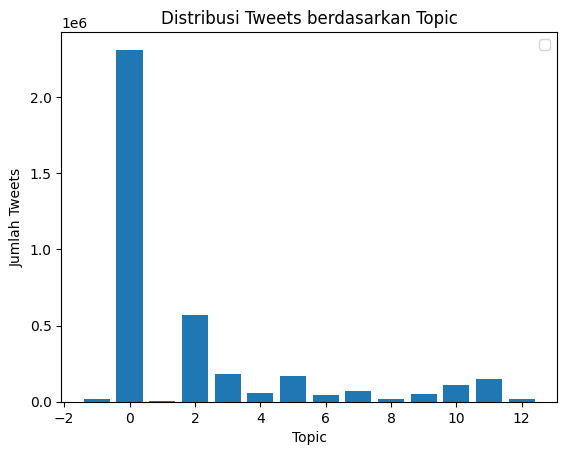

In [6]:
create_bar_plot(df)

# *Line Plot Topics*

In [7]:
def create_stacked_line_plot(df, interval='D'):
    # Memastikan kolom `created_at` bertipe datetime
    df['created_at'] = pd.to_datetime(df['created_at'])

    # Agregasi data berdasarkan `topic` dan interval waktu
    df_agg = df.set_index('created_at').resample(interval)['topic'].value_counts().unstack().fillna(0)

    # Membuat line plot bertumpuk
    plt.figure(figsize=(12, 6))
    plt.stackplot(df_agg.index, df_agg.values.T, labels=df_agg.columns)
    plt.xlabel('Waktu')
    plt.ylabel('Jumlah Kemunculan')
    plt.title(f'Tren Kemunculan Topik per {interval}')
    plt.legend(title='Topik')
    plt.show()

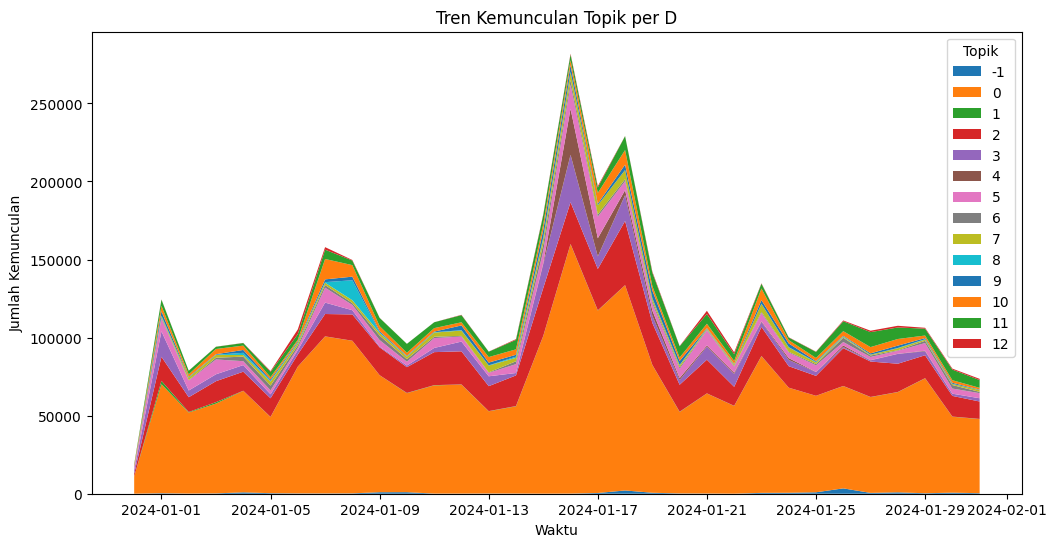

In [8]:
create_stacked_line_plot(df)

# *Boxplot Retweet and Topic*

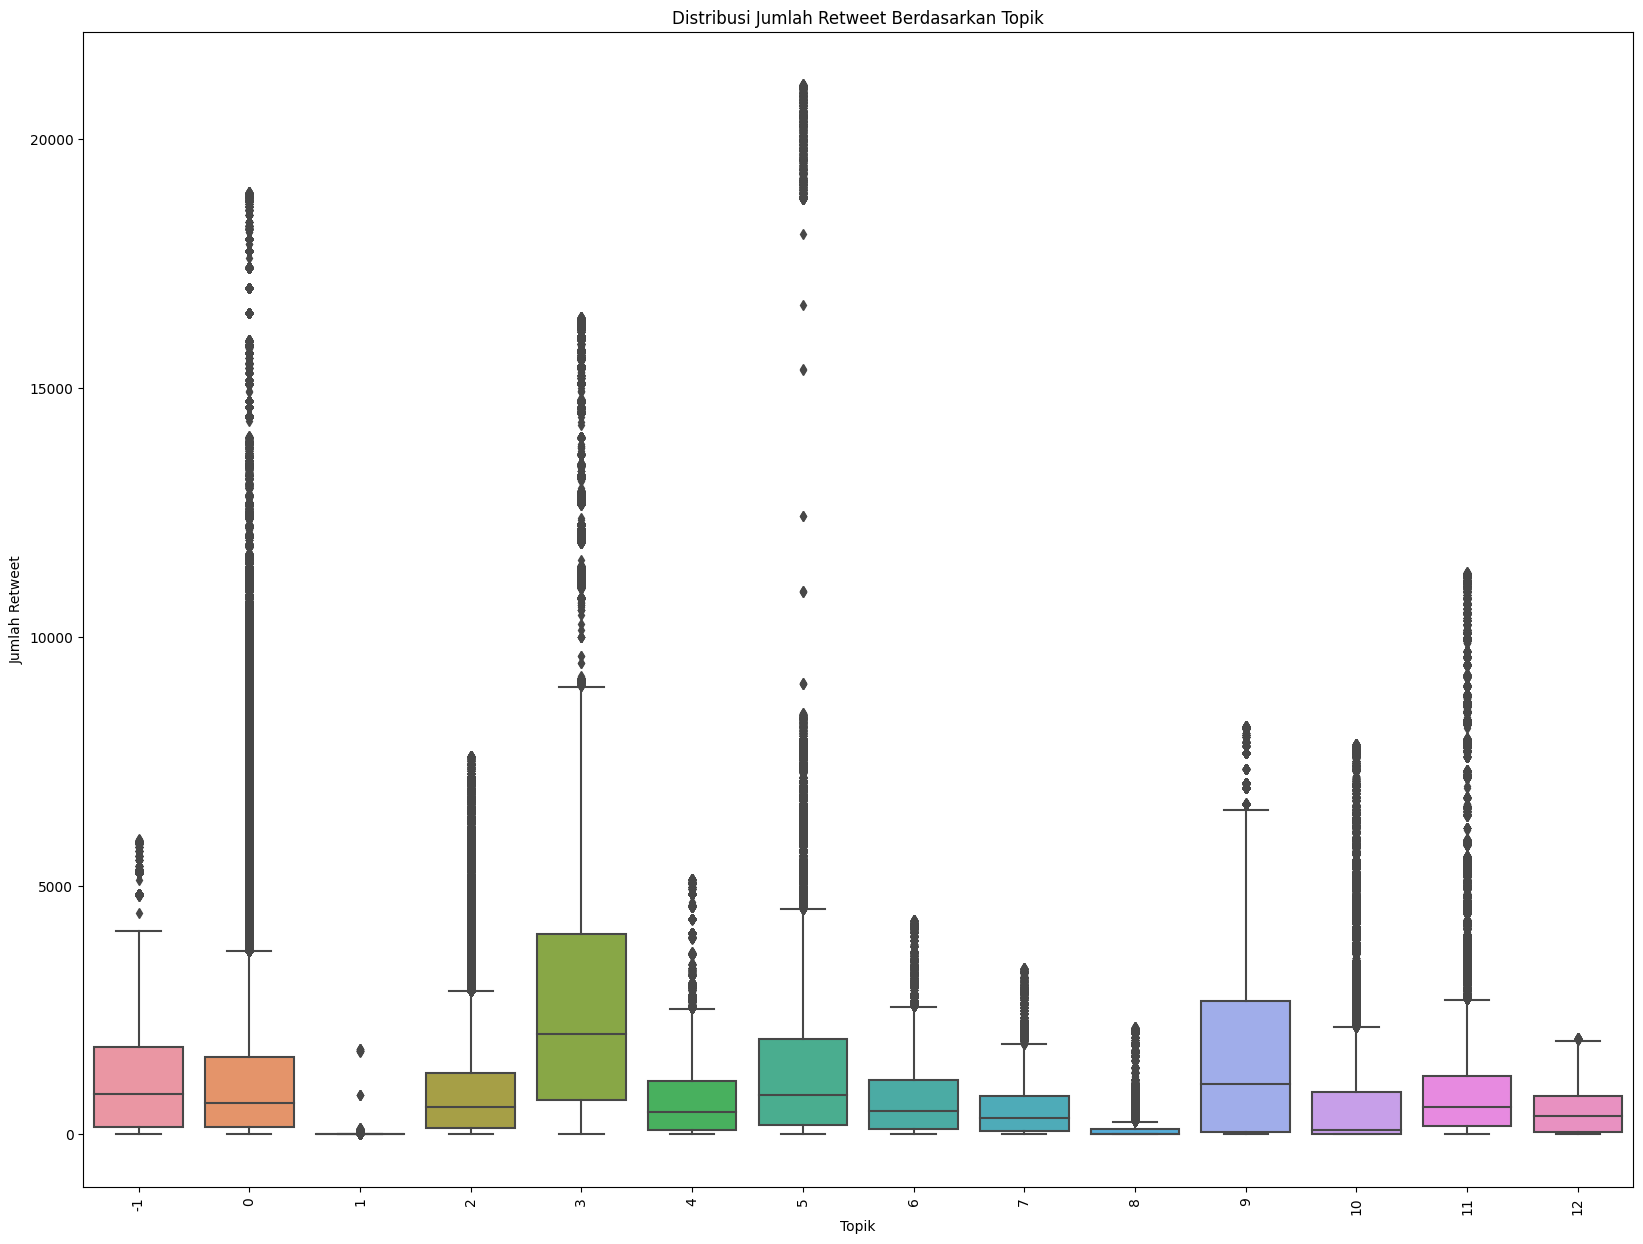

In [9]:
# Box Plot
plt.figure(figsize=(20, 15))
sns.boxplot(x='topic', y='num_retweets', data=df)
plt.xlabel('Topik')
plt.ylabel('Jumlah Retweet')
plt.title('Distribusi Jumlah Retweet Berdasarkan Topik')
plt.xticks(rotation=90)
plt.show()

# *Boxplot Follower and Topics*

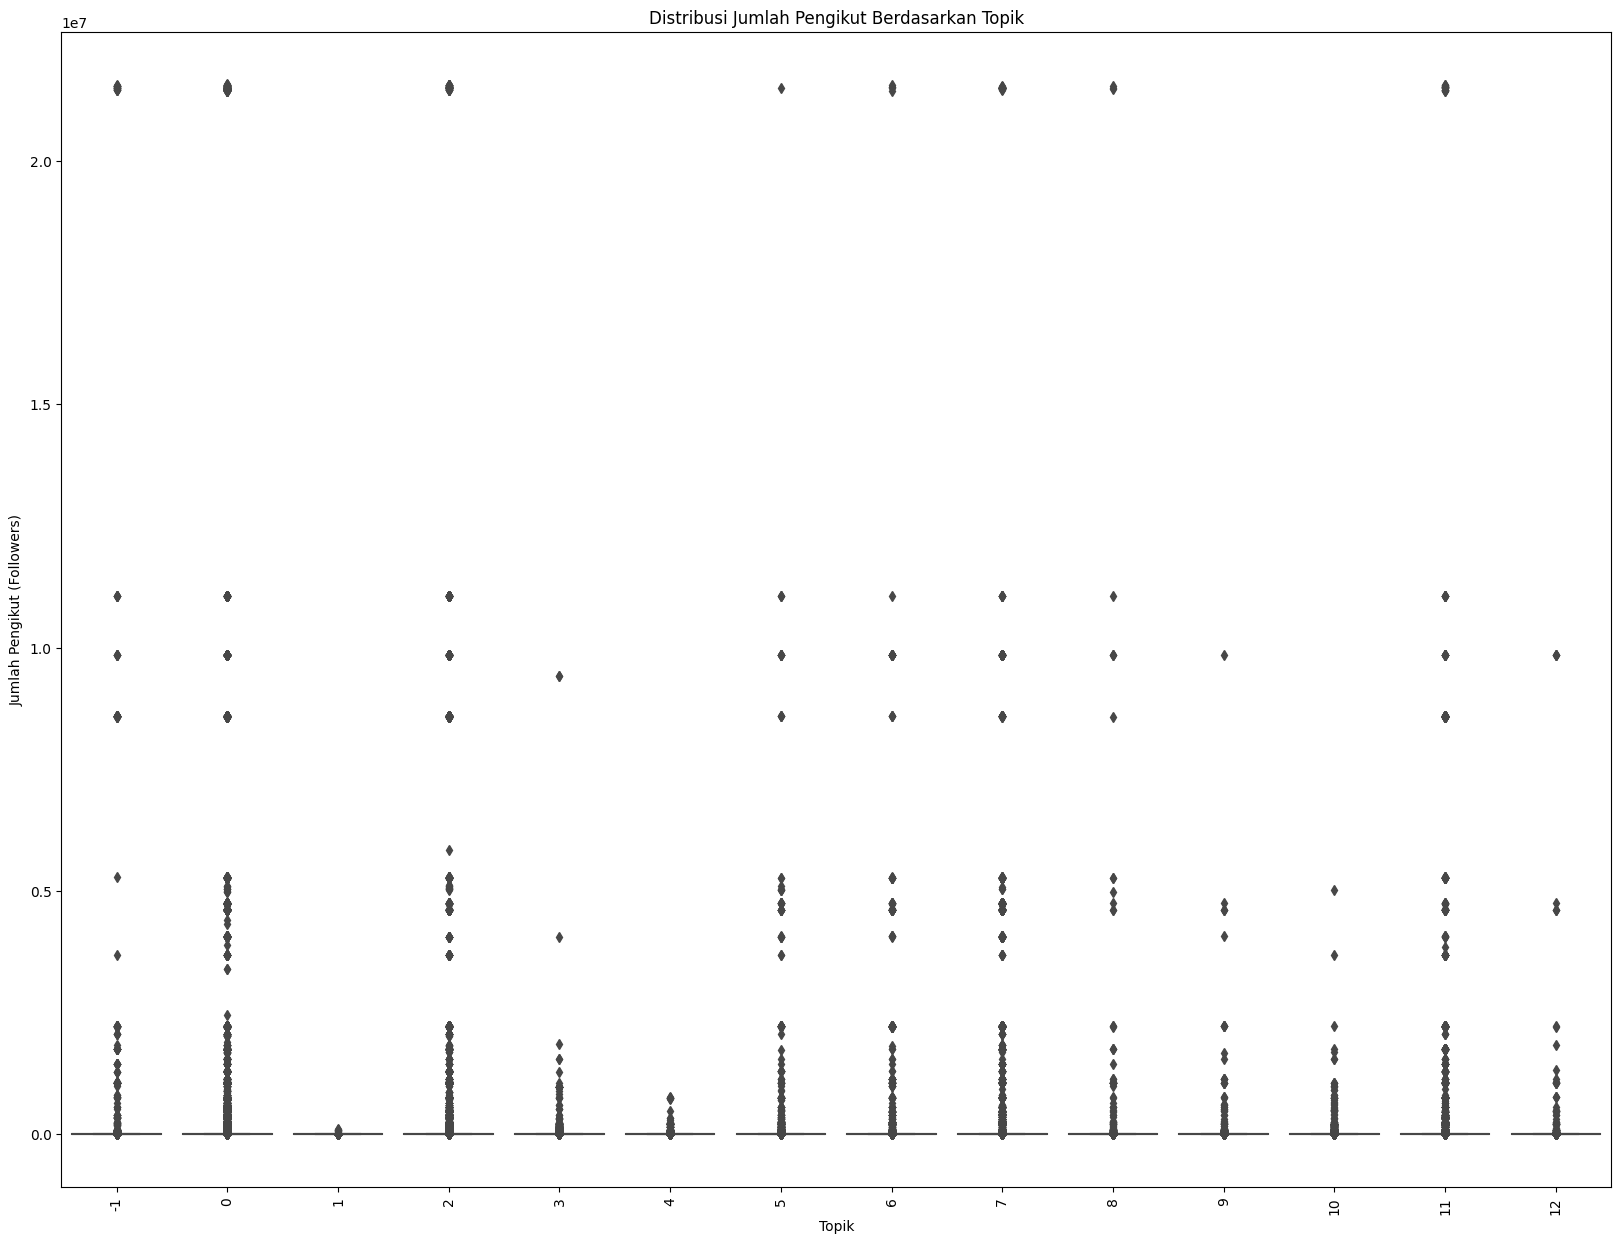

In [10]:
# Box Plot
plt.figure(figsize=(20,15))
sns.boxplot(x='topic', y='flw_cnt', data=df)
plt.xlabel('Topik')
plt.ylabel('Jumlah Pengikut (Followers)')
plt.title('Distribusi Jumlah Pengikut Berdasarkan Topik')
plt.xticks(rotation=90)
plt.show()

# *Boxplot Following with Topics*

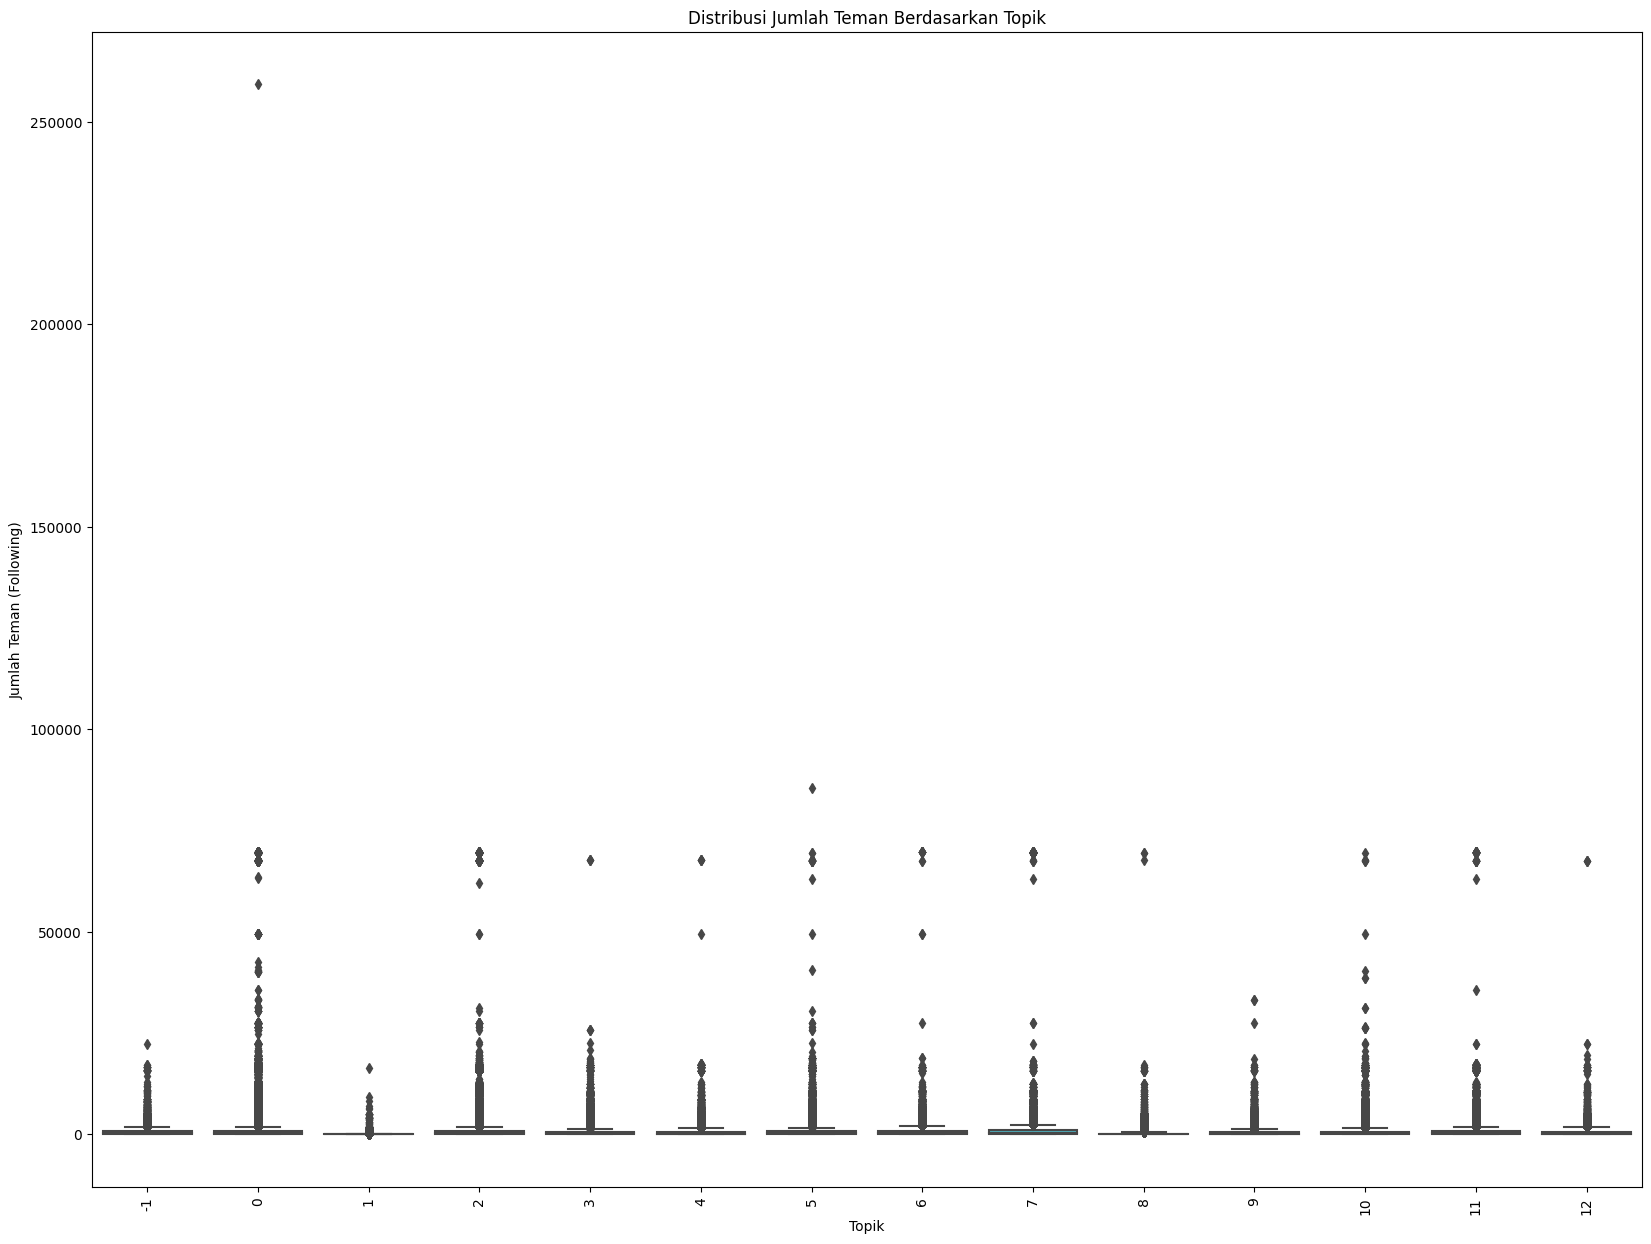

In [11]:
# Box Plot
plt.figure(figsize=(20,15))
sns.boxplot(x='topic', y='frn_cnt', data=df)
plt.xlabel('Topik')
plt.ylabel('Jumlah Teman (Following)')
plt.title('Distribusi Jumlah Teman Berdasarkan Topik')
plt.xticks(rotation=90)
plt.show()

# *Boxplot Status with Topics*

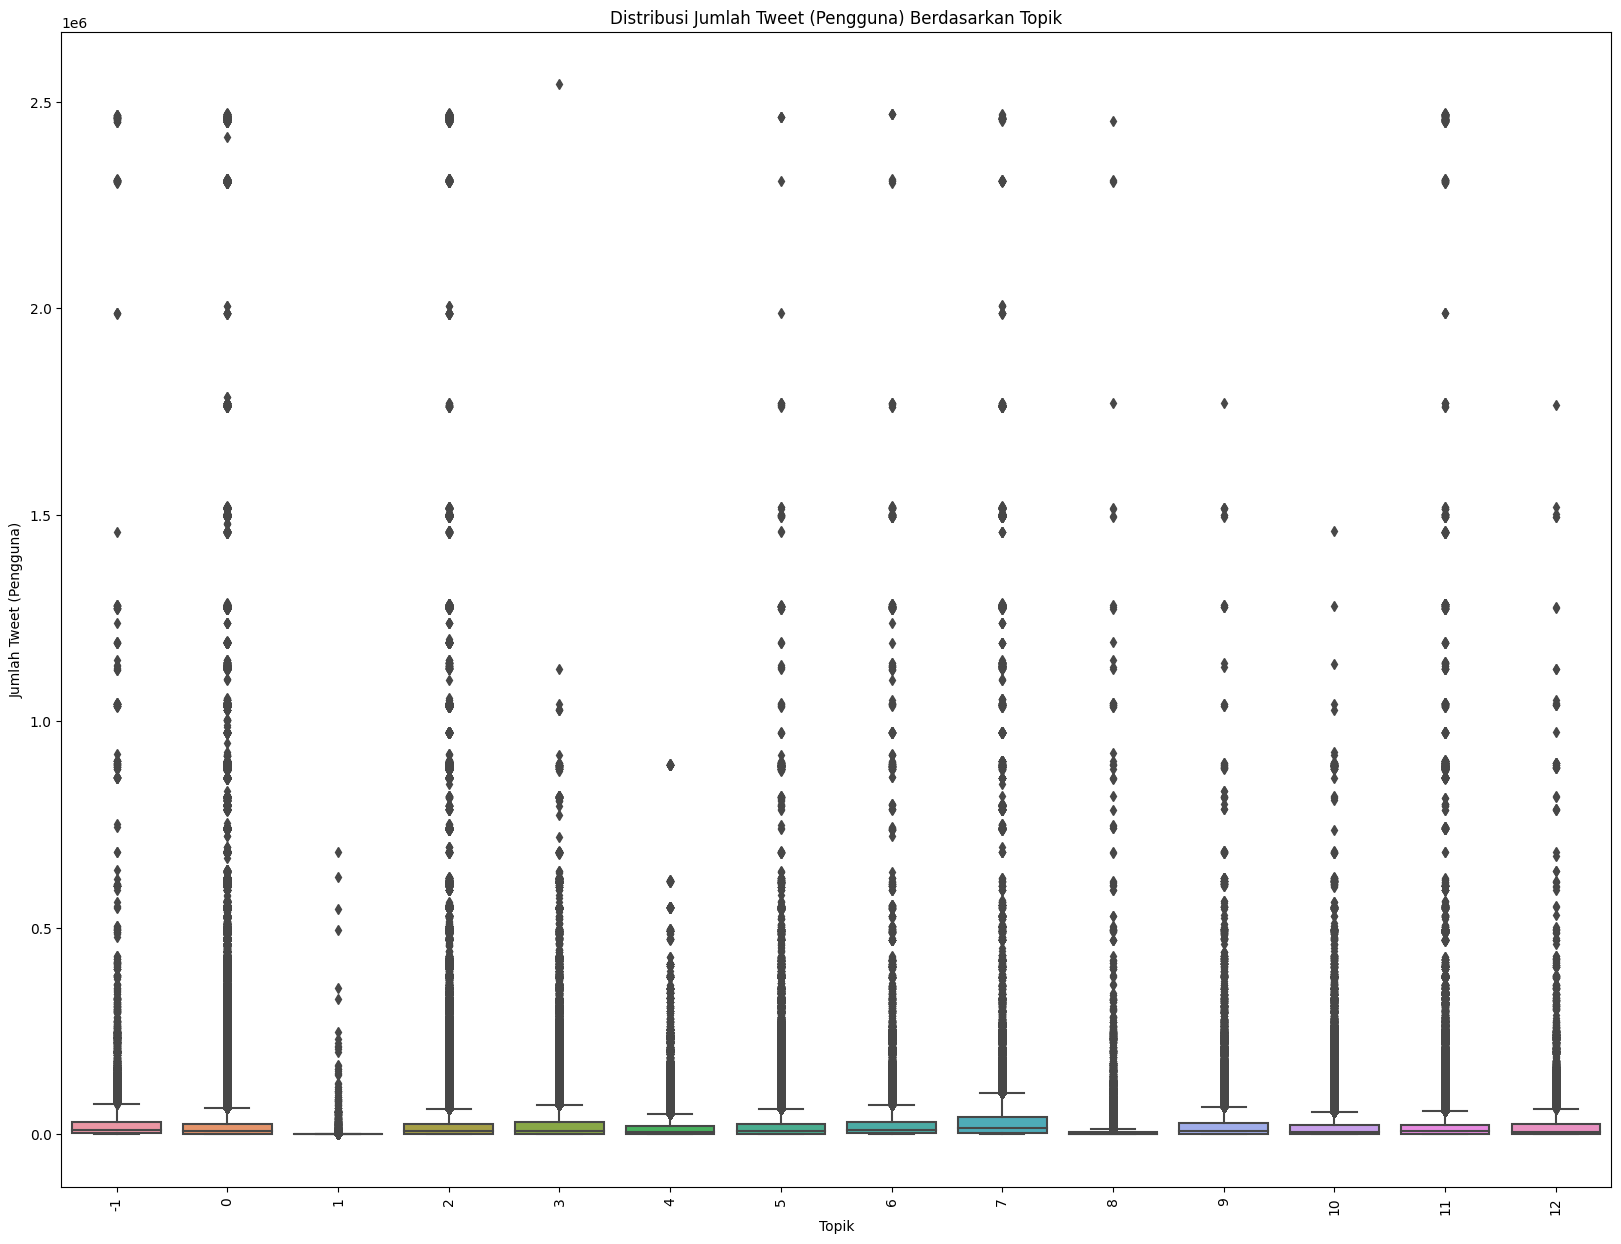

In [12]:
# Box Plot
plt.figure(figsize=(20,15))
sns.boxplot(x='topic', y='sts_cnt', data=df)
plt.xlabel('Topik')
plt.ylabel('Jumlah Tweet (Pengguna)')
plt.title('Distribusi Jumlah Tweet (Pengguna) Berdasarkan Topik')
plt.xticks(rotation=90)
plt.show()

# *Boxplot List with Topics*

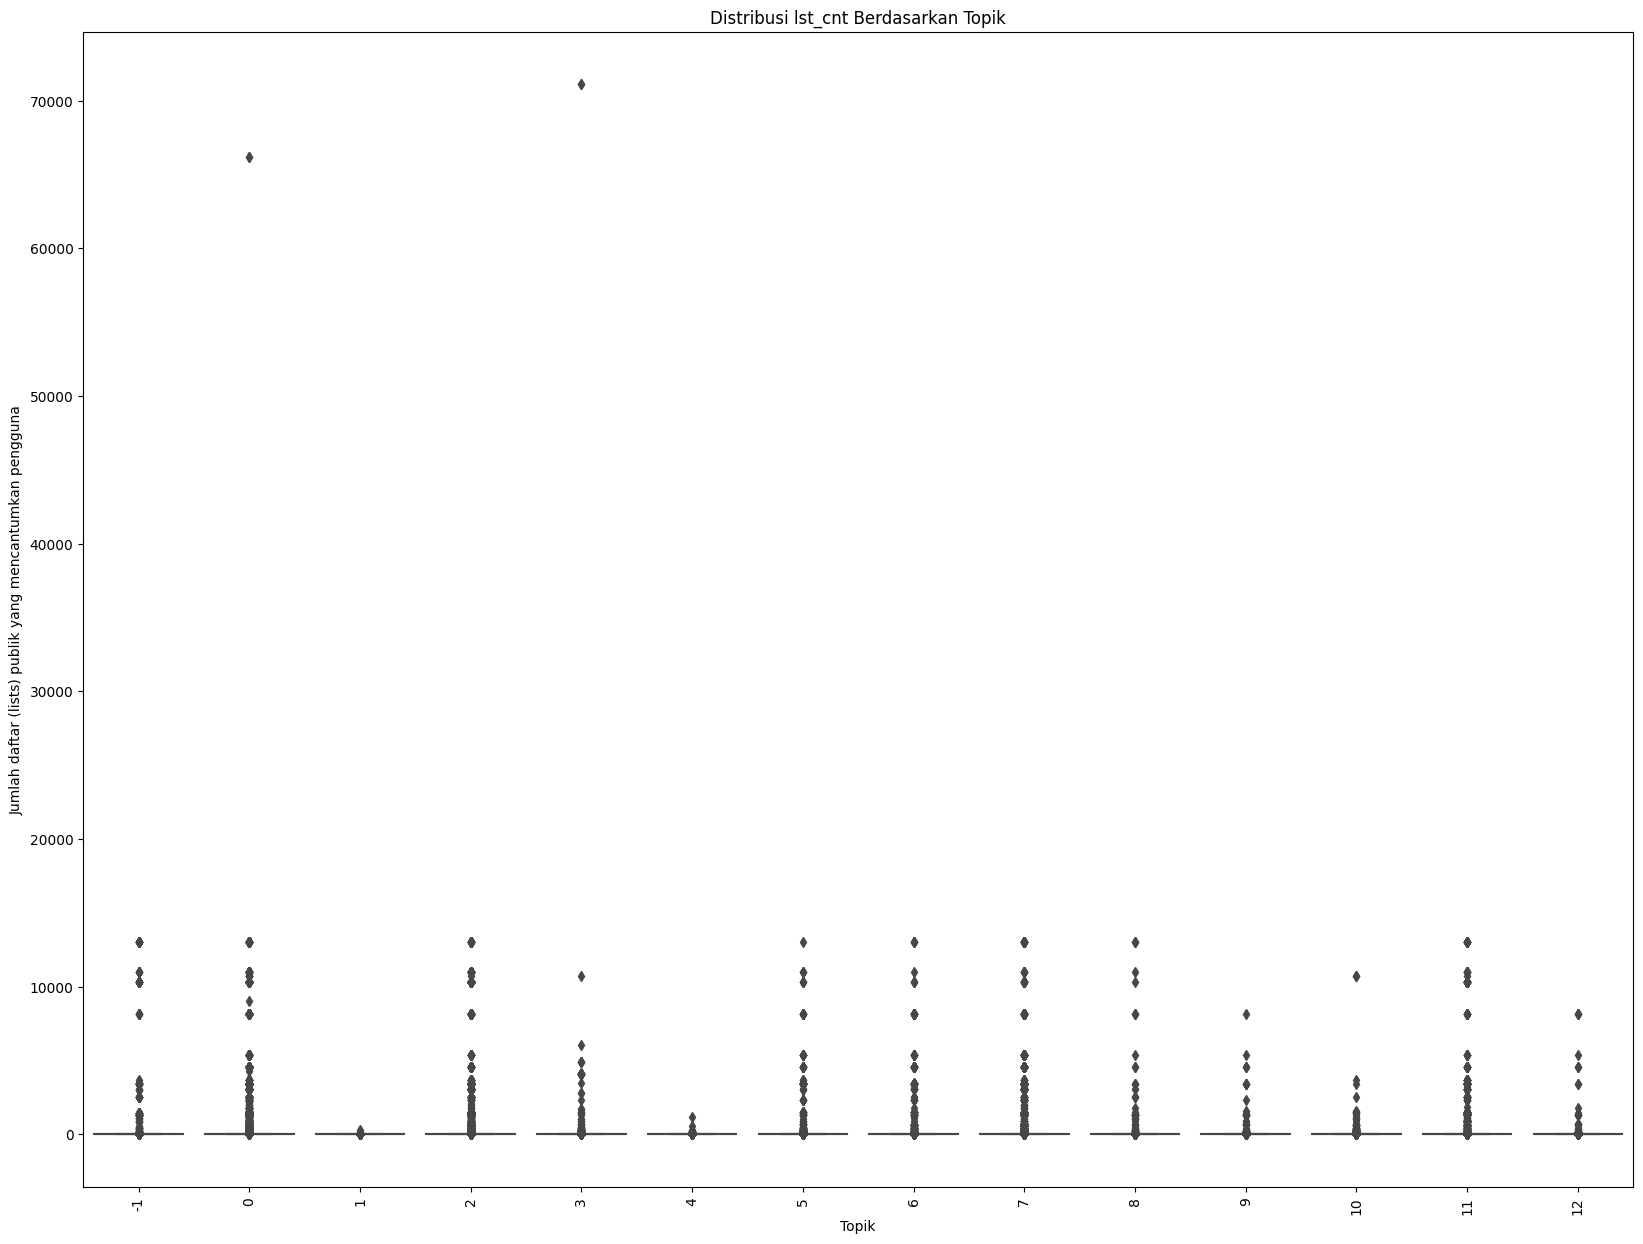

In [13]:
# Box Plot
plt.figure(figsize=(20,15))
sns.boxplot(x='topic', y='lst_cnt', data=df)
plt.xlabel('Topik')
plt.ylabel('Jumlah daftar (lists) publik yang mencantumkan pengguna')
plt.title('Distribusi lst_cnt Berdasarkan Topik')
plt.xticks(rotation=90)
plt.show()

# *Type of Tweets berdasarkan Topics*

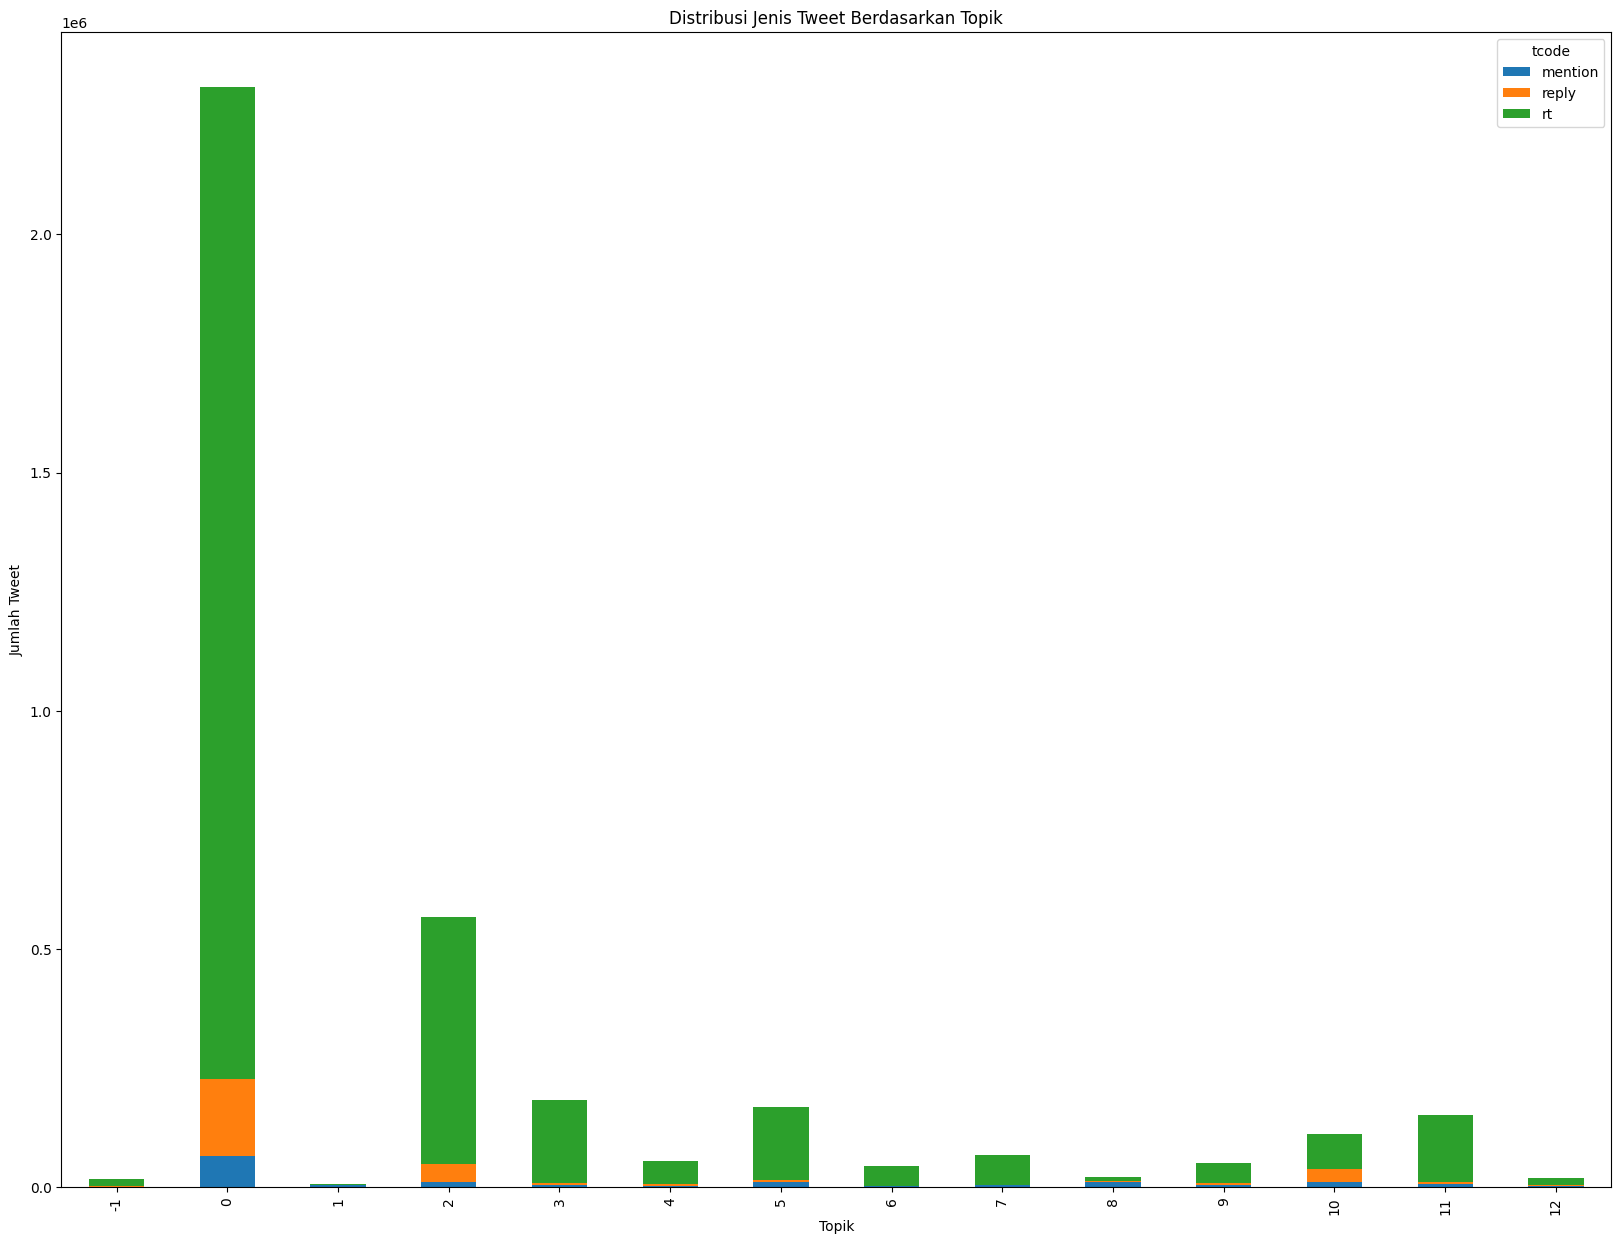

In [14]:
tweet_type_counts = df.groupby(['topic', 'tcode']).size().unstack().fillna(0)
tweet_type_counts.plot(kind='bar', stacked=True, figsize=(20,15))
plt.xlabel('Topik')
plt.ylabel('Jumlah Tweet')
plt.title('Distribusi Jenis Tweet Berdasarkan Topik')
plt.xticks(rotation=90)
plt.show()

# *Jumlah Retweet vs. Pengikut Berdasarkan Topik (Heatmap)*

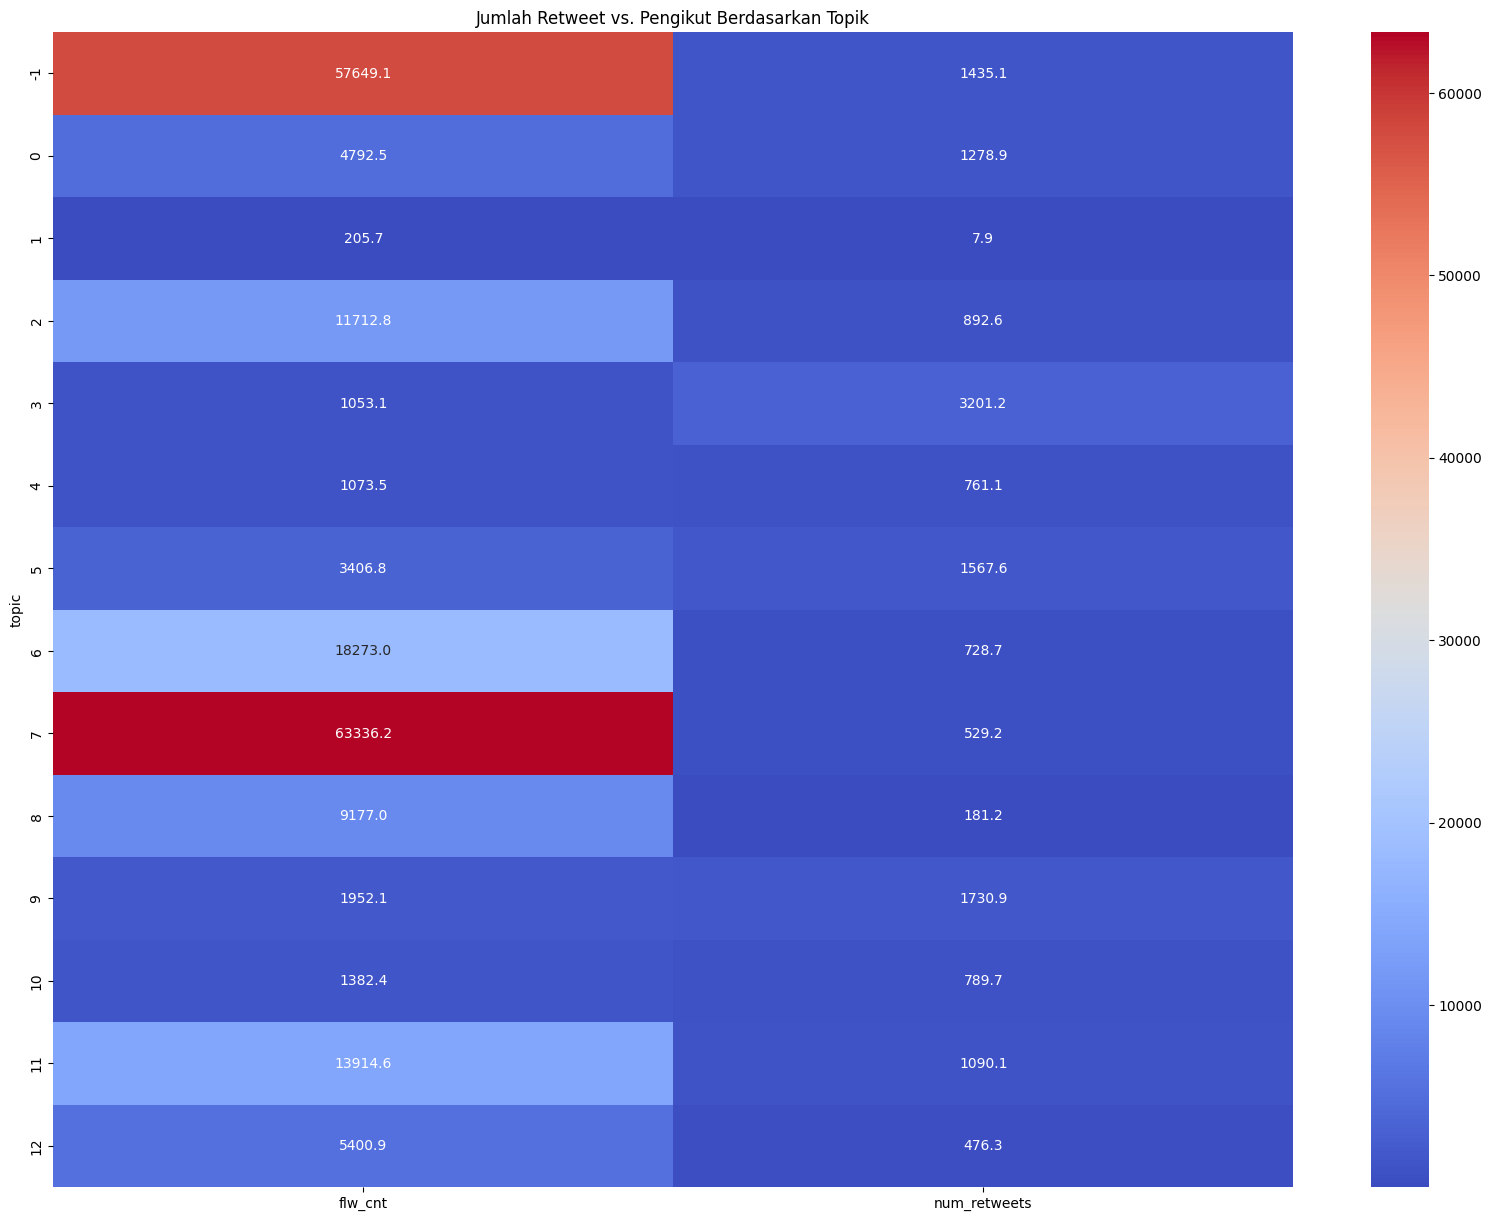

In [15]:
# Heatmap
plt.figure(figsize=(20, 15))
heatmap_data = df.pivot_table(index='topic', values=['num_retweets', 'flw_cnt'], aggfunc='mean')
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Jumlah Retweet vs. Pengikut Berdasarkan Topik')
plt.show()